In [351]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display

In [352]:
width = 256
max_baseline = 4.0

In [353]:
sky = np.zeros(shape=(width, width), dtype=np.complex64)
sky[width//2, width//2]=1

In [354]:
nant=4
ant_pos = []
for i in range(nant):
    x= np.random.uniform(0, max_baseline)
    y= np.random.uniform(0, max_baseline)

    ant_pos.append([x,y])

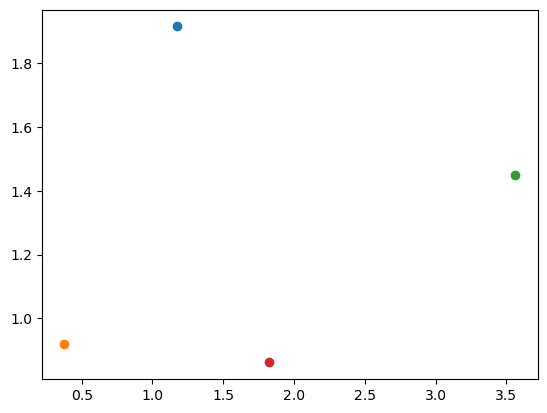

In [355]:
for i in range(nant):
    x,y = ant_pos[i]
    
    plt.plot(x,y,'o')

plt.show()

In [356]:
baselines=[]
for i in range(0,nant):
    for j in range(0,nant):
        if(i!=j):
            a1=ant_pos[i]
            a2=ant_pos[j]

            u=a1[0]-a2[0]
            v=a1[1]-a2[1]
            baselines.append([u,v])

In [357]:
uv=np.zeros(shape=(width,width),dtype=np.complex64)

center= max_baseline//2

for b in baselines:
    u,v=b
    u_index=int(width*(u/max_baseline)/2 + center)
    v_index=int(width*(v/max_baseline)/2 + center)
    uv[u_index,v_index]=1

In [358]:
uv.shape

(256, 256)

In [359]:
baselines

[[0.7938230669438653, 0.9939250653990666],
 [-2.39215604460462, 0.46640374305833143],
 [-0.6507946422030528, 1.0527390243961858],
 [-0.7938230669438653, -0.9939250653990666],
 [-3.1859791115484852, -0.5275213223407351],
 [-1.4446177091469181, 0.058813958997119276],
 [2.39215604460462, -0.46640374305833143],
 [3.1859791115484852, 0.5275213223407351],
 [1.7413614024015671, 0.5863352813378544],
 [0.6507946422030528, -1.0527390243961858],
 [1.4446177091469181, -0.058813958997119276],
 [-1.7413614024015671, -0.5863352813378544]]

In [360]:
uv

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
      dtype=complex64)

In [361]:
sky=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(uv)))

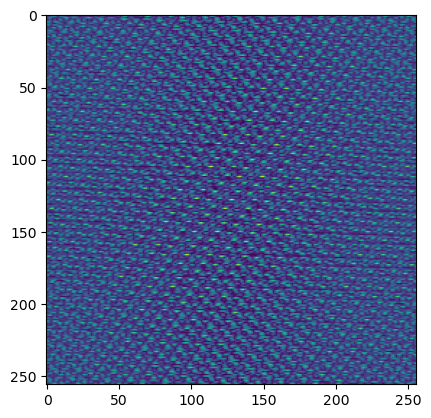

In [362]:
image = (np.abs(sky))
plt.imshow(image)
plt.show()

In [363]:

baselines = [
    [ant_pos[0][0] - ant_pos[1][0], ant_pos[0][1] - ant_pos[1][1]],
    [ant_pos[0][0] - ant_pos[2][0], ant_pos[0][1] - ant_pos[2][1]],
    [ant_pos[0][0] - ant_pos[3][0], ant_pos[0][1] - ant_pos[3][1]],
    [ant_pos[1][0] - ant_pos[0][0], ant_pos[1][1] - ant_pos[0][1]],
    [ant_pos[1][0] - ant_pos[2][0], ant_pos[1][1] - ant_pos[2][1]],
    [ant_pos[1][0] - ant_pos[3][0], ant_pos[1][1] - ant_pos[3][1]],
    [ant_pos[2][0] - ant_pos[0][0], ant_pos[2][1] - ant_pos[0][1]],
    [ant_pos[2][0] - ant_pos[1][0], ant_pos[2][1] - ant_pos[1][1]],
    [ant_pos[2][0] - ant_pos[3][0], ant_pos[2][1] - ant_pos[3][1]],
    [ant_pos[3][0] - ant_pos[0][0], ant_pos[3][1] - ant_pos[0][1]],
    [ant_pos[3][0] - ant_pos[1][0], ant_pos[3][1] - ant_pos[1][1]],
    [ant_pos[3][0] - ant_pos[2][0], ant_pos[3][1] - ant_pos[2][1]],
]

uvs = torch.zeros((width, width), dtype=torch.complex64)
#uvs[u_index,v_index]=1


#v_index=int(width*(v/max_baseline)/2 + center)




u_indices = [
    int((baselines[0][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[1][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[2][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[3][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[4][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[5][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[6][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[7][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[8][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[9][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[10][0] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[11][0] + max_baseline) * width / (2 * max_baseline)),
]

v_indices = [
    int((baselines[0][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[1][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[2][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[3][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[4][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[5][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[6][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[7][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[8][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[9][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[10][1] + max_baseline) * width / (2 * max_baseline)),
    int((baselines[11][1] + max_baseline) * width / (2 * max_baseline)),
]


uvs[u_indices,v_indices]=1

In [364]:
sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uvs)))

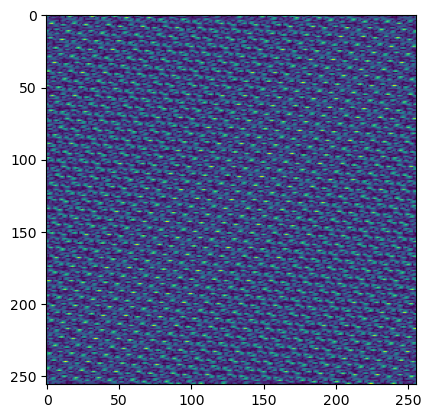

In [365]:
images = (np.abs(sky_image))
plt.imshow(images)
plt.show()

In [366]:
u_indexx=int(width*(u/max_baseline)/2 + center)

In [367]:
u_index=int(width*(u/max_baseline)/2 + center)
v_index=int(width*(v/max_baseline)/2 + center)

In [368]:
v_index!=v_indices

True

In [369]:
v_indices

[159, 142, 161, 96, 111, 129, 113, 144, 146, 94, 126, 109]

In [370]:

v_index

-16